## 4강. 차원 축소

In [1]:
print(pwd())
using Pkg

C:\Users\user

In [2]:
# 모든 패키지가 설치된 후 사용
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

┌ Info: Precompiling UMAP [c4f8c510-2410-5be4-91d7-4fbaeb39457e]
└ @ Base loading.jl:1317
┌ Info: Precompiling Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a]
└ @ Base loading.jl:1317
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317


In [3]:
# Uniform Manifold Approximation and Projection (UMAP) implementation in Julia
using UMAP

In [4]:
# Pkg.add("UMAP")

In [5]:
using UMAP

In [6]:
# High level plotting on the GPU.
using Makie

In [7]:
# Pkg.add("Makie")

In [8]:
using Makie

In [9]:
# Excel file reader and writer coded in pure Julia.
using XLSX

In [10]:
# Julia package for loading the standard Vega data sets
using VegaDatasets

In [11]:
# Pkg.add("VegaDatasets")

In [12]:
using VegaDatasets

In [13]:
# In-memory tabular data in Julia
using DataFrames

In [14]:
# A Julia package for multivariate statistics 
# and data analysis (e.g. dimension reduction)
using MultivariateStats

In [15]:
# Pkg.add("MultivariateStats")

In [16]:
using MultivariateStats

In [17]:
# Julia package for loading many of the data sets available in R
using RDatasets

In [18]:
# Basic statistics for Julia
using StatsBase

In [19]:
# Basic statistics for Julia
using Statistics

In [20]:
# Generic numerical linear algebra in Julia
using LinearAlgebra

In [21]:
# Powerful convenience for Julia visualizations and data analysis
using Plots

In [22]:
# Julia implementation of the scikit-learn API
using ScikitLearn

In [23]:
# Pkg.add("ScikitLearn")

In [24]:
using ScikitLearn

In [25]:
# A set of functions to support the development of machine learning algorithms
using MLBase

In [26]:
# A Julia package for evaluating distances (metrics) between vectors.
using Distances

In [27]:
# Pkg.add("Distances")

In [28]:
using Distances

In [29]:
C = DataFrame(VegaDatasets.dataset("cars"))

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64?,Int64,Float64,Int64?
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


In [30]:
typeof(C)

DataFrame

In [31]:
describe(C)

,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Union…,Any,Int64
1,Name,,amc ambassador brougham,,vw rabbit custom,0
2,Miles_per_Gallon,23.5146,9.0,23.0,46.6,8
3,Cylinders,5.47537,3,4.0,8,0
4,Displacement,194.78,68.0,151.0,455.0,0
5,Horsepower,105.082,46,95.0,230,6
6,Weight_in_lbs,2979.41,1613,2822.5,5140,0
7,Acceleration,15.5197,8.0,15.5,24.8,0
8,Year,,1970-01-01,,1982-01-01,0
9,Origin,,Europe,,USA,0


In [32]:
# 결측치 제거 
dropmissing!(C)

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64,Int64,Float64,Int64
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


In [33]:
M = Matrix(C[:, 2:7]);

In [34]:
names(C)

9-element Vector{String}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

In [35]:
car_origin = C[:, :Origin];

In [36]:
carmap = labelmap(car_origin) # from MLBase

LabelMap (with 3 labels):
[1] USA
[2] Japan
[3] Europe


In [37]:
uniqueids = labelencode(carmap, car_origin)

392-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 2
 1
 1
 1
 3
 1
 1
 1

### 1. PCA

In [38]:
# center and normalize the data
data = M
data = (data.- mean(data, dims = 1))./std(data, dims = 1)

392×6 Matrix{Float64}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   0

- PCA 수행을 위해 행-열 변환

In [39]:
# 각각의 차량들이 열이 됨
data'

6×392 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.697747  -1.08212   -0.697747  …   1.09597    0.583482   0.967851
  1.48205    1.48205    1.48205      -0.862911  -0.862911  -0.862911
  1.07591    1.48683    1.18103      -0.567753  -0.711097  -0.720653
  0.663285   1.57258    1.18288      -0.531795  -0.661694  -0.583754
  0.619748   0.842258   0.539692     -0.803605  -0.415097  -0.303253
 -1.28362   -1.46485   -1.64609   …  -1.4286     1.10867    1.39865

- First, we will fit the model via PCA. `maxoutdim` is the output dimensions, we want it to be 2 in this case. 

In [40]:
p = fit(PCA, data', maxoutdim = 2)

PCA(indim = 6, outdim = 2, principalratio = 0.9194828785333569)

- projection matrix 불러오기 

In [41]:
P = projection(p)

6×2 Matrix{Float64}:
  0.398973  -0.244835
 -0.430615   0.148314
 -0.443531   0.108497
 -0.434122  -0.166158
 -0.430103   0.286095
  0.291926   0.892652

- 행별로 변환시키기

In [42]:
P'*(data[1, :] - mean(p))

2-element Vector{Float64}:
 -2.3230016965226925
 -0.5713519642644688

- transform function(변환 함수) 이용하여 모든 데이터 한꺼번에 변환하기 

In [43]:
Yte = MultivariateStats.transform(p, data')

#notice that Yte[:,1] is the same as P'*(data[1,:]-mean(p))

2×392 Matrix{Float64}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

In [44]:
Yte'

392×2 adjoint(::Matrix{Float64}) with eltype Float64:
 -2.323      -0.571352
 -3.20196    -0.68187
 -2.66658    -0.992744
 -2.60214    -0.621975
 -2.59658    -1.0922
 -4.39584    -1.00949
 -4.91344    -1.36635
 -4.82935    -1.53521
 -4.90421    -1.03943
 -4.05041    -1.66611
 -3.49112    -1.19836
 -3.48212    -1.80003
 -3.49077    -1.18949
  ⋮          
  0.0479631   0.226239
  0.67918     0.228058
  0.894187   -0.663259
 -0.468293   -0.222508
  1.10264    -1.04837
  1.53475    -1.52194
  1.10051     0.337723
  1.09338    -0.260354
  3.81463     1.99828
  1.22011    -1.87471
  1.70921     0.632857
  1.86951     0.815607

#### recontruct

> reconstruct를 이용하면 근사적으로 원 데이터를 산출할 수 있음

In [45]:
# reconstruct testing observations(approxiately)
Xr = reconstruct(p, Yte)

6×392 Matrix{Float64}:
 -0.786928  -1.11055  -0.820834  …   0.945785   0.526984   0.546196
  0.91558    1.27768   1.00103      -0.803445  -0.64215   -0.684075
  0.968334   1.34619   1.075        -0.744559  -0.689425  -0.740696
  1.1034     1.50334   1.32257      -0.218179  -0.847159  -0.947116
  0.835669   1.18209   0.862883     -1.06112   -0.554079  -0.570742
 -1.18816   -1.54341  -1.66462   …  -1.31728    1.06388    1.27381

In [46]:
norm(Xr - data') # 0이 되지 않음

13.74384105556901

PC1과 PC2에 대한 scatter plot 그리기

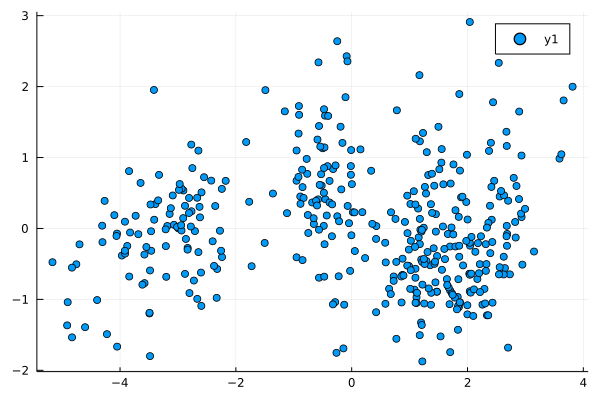

In [47]:
Plots.scatter(Yte[1, :], Yte[2, :])

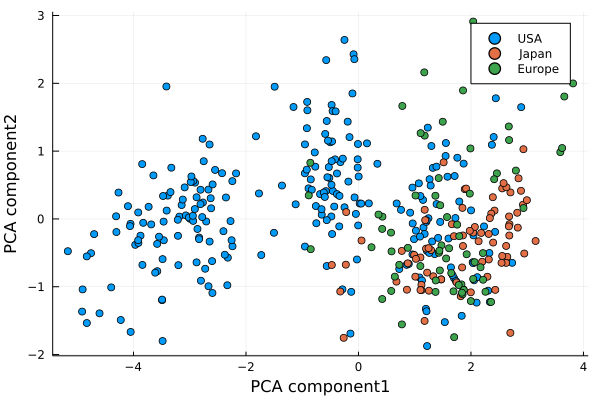

In [48]:
Plots.scatter(Yte[1, car_origin .== "USA"],
              Yte[2, car_origin .== "USA"],
              color = 1,
              label = "USA")
Plots.xlabel!("PCA component1")
Plots.ylabel!("PCA component2")
Plots.scatter!(Yte[1, car_origin .== "Japan"],
               Yte[2, car_origin .== "Japan"],
               color = 2, 
               label = "Japan")
Plots.scatter!(Yte[1, car_origin .== "Europe"],
               Yte[2, car_origin .== "Europe"],
               color = 3,
               label = "Europe")

In [49]:
p = fit(PCA, data', maxoutdim = 3)

PCA(indim = 6, outdim = 3, principalratio = 0.9625607644667082)

In [50]:
Yte = MultivariateStats.transform(p, data')

3×392 Matrix{Float64}:
 -2.323     -3.20196   -2.66658   …   1.22011   1.70921    1.86951
 -0.571352  -0.68187   -0.992744     -1.87471   0.632857   0.815607
  0.288803   0.114558   0.287299      0.17119  -0.0208894  0.34713

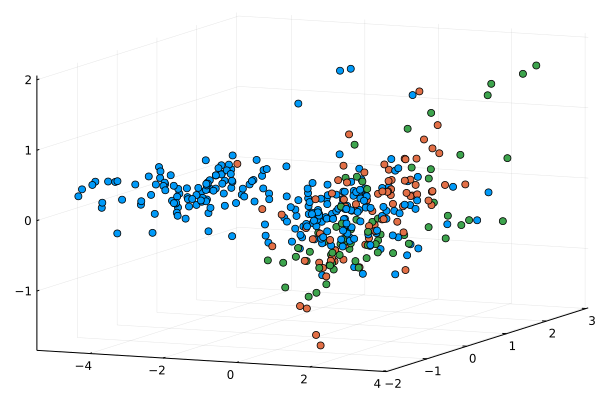

In [51]:
scatter3d(Yte[1, :], Yte[2, :], Yte[3, :],
          color = uniqueids , 
          legend = false)

> 자유롭게 회전시키면서 보려고 한다면 Mackie 패키지 이용

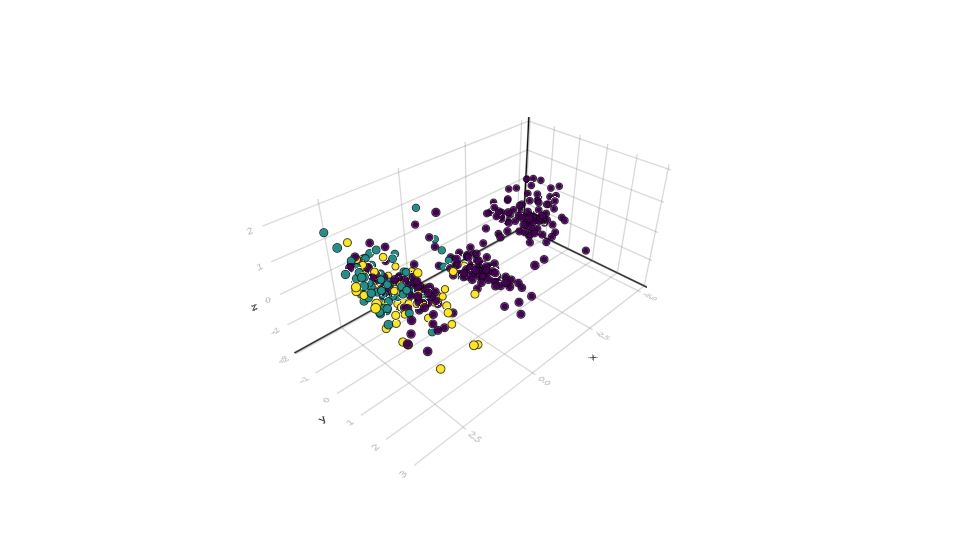

In [52]:
scene = Makie.scatter(Yte[1, :], Yte[2, :], Yte[3, :],
                      color = uniqueids,
                      markersize = 100)

In [53]:
display(scene)

GLMakie.Screen(...)

In [54]:
?Makie.scatter

```
scatter(positions)
scatter(x, y)
scatter(x, y, z)
```

Plots a marker for each element in `(x, y, z)`, `(x, y)`, or `positions`.

## Attributes

Available attributes and their defaults for `Scatter{T} where T` are: 

```
  ambient           Float32[0.55, 0.55, 0.55]
  color             :gray65
  colormap          :viridis
  diffuse           Float32[0.4, 0.4, 0.4]
  distancefield     "nothing"
  glowcolor         RGBA{N0f8}(0.0,0.0,0.0,0.0)
  glowwidth         0.0
  lightposition     :eyeposition
  linewidth         1
  marker            Circle{T} where T
  marker_offset     AbstractPlotting.Automatic()
  markersize        10
  markerspace       Pixel
  nan_color         RGBA{Float32}(0.0f0,0.0f0,0.0f0,0.0f0)
  overdraw          false
  rotations         Billboard()
  shininess         32.0f0
  specular          Float32[0.2, 0.2, 0.2]
  ssao              false
  strokecolor       :black
  strokewidth       1.0
  transform_marker  false
  transparency      false
  uv_offset_width   Float32[0.0, 0.0, 0.0, 0.0]
  visible           true
```


In [55]:
?display

search: display displaysize displayable redisplay popdisplay pushdisplay



```
display(x)
display(d::AbstractDisplay, x)
display(mime, x)
display(d::AbstractDisplay, mime, x)
```

AbstractDisplay `x` using the topmost applicable display in the display stack, typically using the richest supported multimedia output for `x`, with plain-text [`stdout`](@ref) output as a fallback. The `display(d, x)` variant attempts to display `x` on the given display `d` only, throwing a [`MethodError`](@ref) if `d` cannot display objects of this type.

In general, you cannot assume that `display` output goes to `stdout` (unlike [`print(x)`](@ref) or [`show(x)`](@ref)).  For example, `display(x)` may open up a separate window with an image. `display(x)` means "show `x` in the best way you can for the current output device(s)." If you want REPL-like text output that is guaranteed to go to `stdout`, use [`show(stdout, "text/plain", x)`](@ref) instead.

There are also two variants with a `mime` argument (a MIME type string, such as `"image/png"`), which attempt to display `x` using the requested MIME type *only*, throwing a `MethodError` if this type is not supported by either the display(s) or by `x`. With these variants, one can also supply the "raw" data in the requested MIME type by passing `x::AbstractString` (for MIME types with text-based storage, such as text/html or application/postscript) or `x::Vector{UInt8}` (for binary MIME types).

To customize how instances of a type are displayed, overload [`show`](@ref) rather than `display`, as explained in the manual section on [custom pretty-printing](@ref man-custom-pretty-printing).


### 2. t-SNE

- t-분포 확률적 임베딩
- 여러가지 방법: https://github.com/nassarhuda/JuliaTutorials/blob/master/TSNE/TSNE.ipynb
- 여기서는 싸이킷런을 이용해서 사용

In [56]:
@sk_import manifold : TSNE

PyObject <class 'sklearn.manifold._t_sne.TSNE'>

In [57]:
tfn = TSNE(n_components = 2) # perplexity=20.0,early_exaggeration=50

PyObject TSNE()

In [58]:
Y2 = tfn.fit_transform(data);

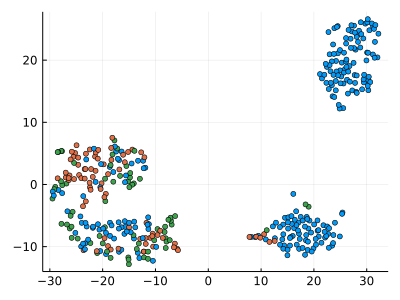

In [59]:
Plots.scatter(Y2[:, 1], Y2[:, 2], 
              color = uniqueids, 
              legend = false,
              size = (400, 300), markersize = 3)

### 3. UMAP

- 마지막 차원 축소 방법 UMAP

In [60]:
# cars를 normalization한 데이터
L = cor(data, data, dims = 2)

392×392 Matrix{Float64}:
  1.0        0.960859   0.980739   …  -0.15566    -0.985626  -0.987866
  0.960859   1.0        0.98143       -0.214363   -0.987499  -0.991891
  0.980739   0.98143    1.0           -0.0696836  -0.996246  -0.991744
  0.976964   0.990698   0.987283      -0.221491   -0.988356  -0.992669
  0.990434   0.972891   0.996659      -0.0743694  -0.996455  -0.991605
  0.914253   0.980862   0.953547   …  -0.131122   -0.964837  -0.963207
  0.889778   0.97211    0.943482      -0.103086   -0.950894  -0.947428
  0.898549   0.97346    0.950816      -0.0822493  -0.957647  -0.952454
  0.875422   0.969313   0.930575      -0.147112   -0.939694  -0.938767
  0.930558   0.981423   0.9771        -0.0440158  -0.978168  -0.971042
  0.955677   0.992142   0.986872   …  -0.108384   -0.986813  -0.986542
  0.967174   0.981264   0.99359       -0.0370968  -0.994966  -0.987287
  0.972225   0.976286   0.978719      -0.0923206  -0.986185  -0.986353
  ⋮                                ⋱               ⋮

In [61]:
embedding = umap(L, 2)

2×392 Matrix{Float64}:
 6.37635  5.76024  6.42795  6.13957  6.50049  …  -4.37793  -5.94029  -6.3187
 5.65558  5.8178   6.22828  5.6588   6.01638      4.07352  -3.8587   -3.66811

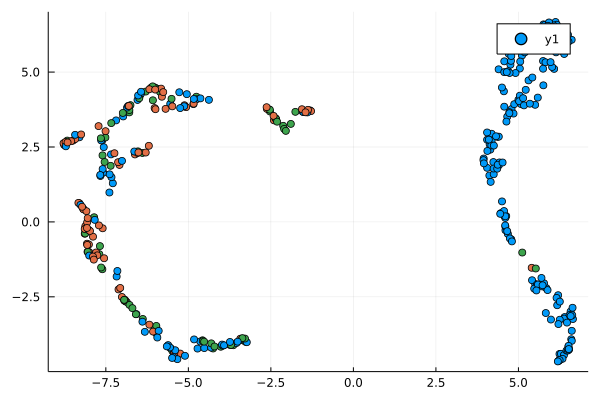

In [62]:
Plots.scatter(embedding[1, :], embedding[2, :], color = uniqueids)

For UMAP, we can create distances between every pair of observations differently, if we choose to. But even with both choices, we will see that UMAP generates a very similar pattern to what we have observed with t-SNE and PCA.

In [63]:
L = pairwise(Euclidean(), data, data, dims = 1)

392×392 Matrix{Float64}:
 4.21468e-8  1.10715   0.647168  0.58605   …  3.85916   4.3455    4.59372
 1.10715     0.0       0.719382  0.698612     4.64789   5.12834   5.36058
 0.647168    0.719382  0.0       0.463634     4.07019   4.7564    4.99914
 0.58605     0.698612  0.463634  0.0          4.13105   4.58092   4.83094
 0.621288    0.954891  0.374659  0.616639     3.98254   4.75213   5.01882
 2.47478     1.47736   2.02351   2.16025   …  5.74861   6.35209   6.54297
 3.14437     2.11486   2.63678   2.79031      6.27365   6.96953   7.15936
 3.04449     2.03888   2.52157   2.69941      6.14792   6.92088   7.12142
 3.17107     2.11928   2.69451   2.79893      6.34131   6.89638   7.07059
 2.23206     1.33588   1.66126   1.90321      5.32719   6.22325   6.45446
 1.51179     0.659817  0.978414  1.18545   …  4.83905   5.57813   5.82124
 1.75698     1.28905   1.26423   1.54809      4.75916   5.80249   6.08108
 1.45611     0.955045  1.09718   1.35214      4.81189   5.61281   5.86617
 ⋮           

In [64]:
embedding = umap(-L, 2)

2×392 Matrix{Float64}:
 7.33618  8.73767   7.20957  7.23989  …  -6.96074  -3.86994  -4.0356
 2.96389  0.350092  2.40247  2.49833     -3.52689  -1.55898  -1.34227

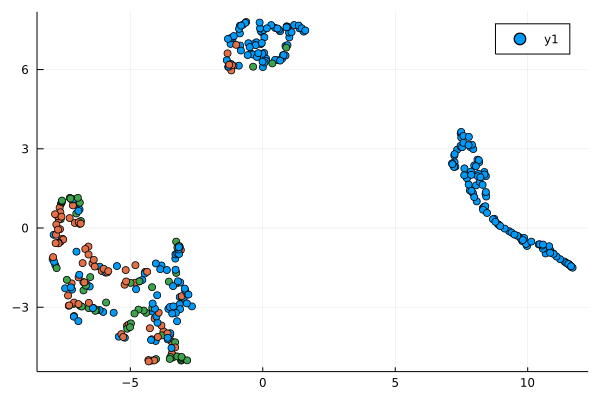

In [65]:
Plots.scatter(embedding[1, :], embedding[2, :], color = uniqueids)

# Finally...
After finishing this notebook, you should be able to:
- [ ] apply tsne on your data
- [ ] apply umap on your data
- [ ] apply pca on your data
- [ ] generate a 3d plot
- [ ] call a function from Python's ScikitLearn

# 번외
## 별첨 1. 줄리아에서 t-SNE 방법 사용하기

In [66]:
using TSne

┌ Info: Precompiling TSne [24678dba-d5e9-5843-a4c6-250288b04835]
└ @ Base loading.jl:1317


In [67]:
# Pkg.add("TSne")

In [69]:
# Pkg.add("MLDatasets")

    Updating registry at `C:\Users\user\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed GZip ─────── v0.5.1
   Installed DataDeps ─── v0.7.7
   Installed MLDatasets ─ v0.5.6
    Updating `C:\Users\user\.julia\environments\v1.6\Project.toml`
  [eb30cadb] + MLDatasets v0.5.6
    Updating `C:\Users\user\.julia\environments\v1.6\Manifest.toml`
  [9e28174c] + BinDeps v1.0.2
  [b99e7846] + BinaryProvider v0.5.10
  [124859b0] + DataDeps v0.7.7
  [92fee26a] + GZip v0.5.1
  [eb30cadb] + MLDatasets v0.5.6
    Building DataDeps → `C:\Users\user\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\4f0e41ff461d42cfc62ff0de4f1cd44c6e6b3771\build.log`
Precompiling project...
  ✓ GZip
  ✓ BinDeps
  ✓ NearestNeighbors
  ✓ AxisArrays
  ✓ BinaryProvider
  ✓ ImageDistances
  ✓ MeshIO
  ✓ Clustering
  ✓ DataDeps
  ✓ ImageAxes
  ✓ ImageQualityIndexes
  ✓ MLDatasets
  ✓ ImageMetadata
  ✓ StatsPlots
  ✓ Images

In [72]:
using Statistics, 
    MLDatasets, 
    BenchmarkTools, 
    Plots, 
    RDatasets, 
    LinearAlgebra, 
    PyCall, 
    ScikitLearn, 
    ColorSchemes

In [71]:
#Pkg.add("ColorSchemes")

   Resolving package versions...
    Updating `C:\Users\user\.julia\environments\v1.6\Project.toml`
  [35d6a980] + ColorSchemes v3.11.0
  No Changes to `C:\Users\user\.julia\environments\v1.6\Manifest.toml`


In [106]:
# my plotting function for producing visually appealing plots
function my_tsne_plot(Y, d, labels)
    colorsvec = get(ColorSchemes.tab10, labels, :extrema)
    Plots.plot(legend = false, asxis = false, grid = false)
    tsneplot = Plots.scatter!(Y[:, 1], Y[:, 2],
                        marker = (2, 2, :auto, stroke(0)), alpha = 0.8, 
                        background_color =:black,
                        color = colorsvec)
    for i = 0:9
        mx, my = mean(Y[findall(labels.==i), :], dims = 1)
        s = Shape(mx.+[-d, d, d, -d], my.+[-d, -d, d, d])
        Plots.plot!(s, 
                    color = ColorSchemes.tab10[i+1], 
                    linewidth = 0, alpha = 0.9)
        annotate!(mx, my, Plots.text(string(i), color =:white))
    end
    return tsneplot
end

my_tsne_plot (generic function with 1 method)

In [98]:
alldata, labels = MNIST.traindata(Float64);

This program has requested access to the data dependency MNIST.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Dataset: THE MNIST DATABASE of handwritten digits
Authors: Yann LeCun, Corinna Cortes, Christopher J.C. Burges
Website: http://yann.lecun.com/exdb/mnist/

[LeCun et al., 1998a]
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner.
    "Gradient-based learning applied to document recognition."
    Proceedings of the IEEE, 86(11):2278-2324, November 1998

The files are available for download at the offical
website linked above. Note that using the data
responsibly and respecting copyright remains your
responsibility. The authors of MNIST aren't really
explicit about any terms of use, so please read the
website to make sure you want to download the
dataset.



Do you want to download the dataset from ["https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz", "https://ossci-datasets.s3.amazonaws.com/mn

In [99]:
data = reshape(permutedims(alldata[:, :, 1:3000], (3, 1, 2)),
               3000, size(alldata, 1)*size(alldata, 2));
labels = labels[1:3000]

3000-element Vector{Int64}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 1
 9
 4
 8
 6
 5
 1
 7
 0
 9
 1
 5

In [100]:
@show size(data);

size(data) = (3000, 784)


#### Julia package 이용  

In [101]:
using TSne

In [102]:
rescale(A; dims = 1) = (A .- mean(A, dims = dims)) ./ max.(std(A, dims = dims), 
        eps())


rescale (generic function with 1 method)

In [103]:
X = rescale(data, dims = 1);

In [104]:
Y1 = tsne(X, 2, 50, 1000, 20.0);

Computing point perplexities100%|███████████████████████| Time: 0:00:02
Computing t-SNE  0%|█                                   |  ETA: 0:02:44
4m  KL_divergence:  5.0608 (warmup)
Computing t-SNE  1%|█                                   |  ETA: 0:00:58
4m  KL_divergence:  5.0608 (warmup)
Computing t-SNE  1%|█                                   |  ETA: 0:00:48
4m  KL_divergence:  5.0608 (warmup)
Computing t-SNE  2%|█                                   |  ETA: 0:00:43
4m  KL_divergence:  5.0608 (warmup)
Computing t-SNE  2%|█                                   |  ETA: 0:00:39
4m  KL_divergence:  5.0608 (warmup)
Computing t-SNE  2%|█                                   |  ETA: 0:00:38
4m  KL_divergence:  5.0608 (warmup)
Computing t-SNE  3%|██                                  |  ETA: 0:00:37
4m  KL_divergence:  5.0608 (warmup)
Computing t-SNE  3%|██                                  |  ETA: 0:00:36
4m  KL_divergence:  5.0608 (warmup)
Computing t-SNE  4%|██                                  |  ETA: 

4m  KL_divergence:  4.2028 (warmup)
Computing t-SNE 25%|██████████                          |  ETA: 0:00:27
4m  KL_divergence:  4.2059
Computing t-SNE 26%|██████████                          |  ETA: 0:00:27
4m  KL_divergence:  4.2059
Computing t-SNE 26%|██████████                          |  ETA: 0:00:27
4m  KL_divergence:  4.2059
Computing t-SNE 26%|██████████                          |  ETA: 0:00:27
4m  KL_divergence:  4.2059
Computing t-SNE 27%|██████████                          |  ETA: 0:00:26
4m  KL_divergence:  4.2059
Computing t-SNE 27%|██████████                          |  ETA: 0:00:26
4m  KL_divergence:  4.2059
Computing t-SNE 28%|██████████                          |  ETA: 0:00:26
4m  KL_divergence:  4.2059
Computing t-SNE 28%|███████████                         |  ETA: 0:00:26
4m  KL_divergence:  4.2059
Computing t-SNE 28%|███████████                         |  ETA: 0:00:26
4m  KL_divergence:  4.2059
Computing t-SNE 29%|███████████                         |  ETA: 0:00:26
4

4m  KL_divergence:  1.2933
Computing t-SNE 55%|████████████████████                |  ETA: 0:00:15
4m  KL_divergence:  1.2933
Computing t-SNE 55%|████████████████████                |  ETA: 0:00:15
4m  KL_divergence:  1.2539
Computing t-SNE 56%|████████████████████                |  ETA: 0:00:15
4m  KL_divergence:  1.2539
Computing t-SNE 56%|█████████████████████               |  ETA: 0:00:15
4m  KL_divergence:  1.2539
Computing t-SNE 56%|█████████████████████               |  ETA: 0:00:15
4m  KL_divergence:  1.2539
Computing t-SNE 57%|█████████████████████               |  ETA: 0:00:15
4m  KL_divergence:  1.2539
Computing t-SNE 57%|█████████████████████               |  ETA: 0:00:15
4m  KL_divergence:  1.2539
Computing t-SNE 58%|█████████████████████               |  ETA: 0:00:14
4m  KL_divergence:  1.2539
Computing t-SNE 58%|█████████████████████               |  ETA: 0:00:14
4m  KL_divergence:  1.2539
Computing t-SNE 58%|██████████████████████              |  ETA: 0:00:14
4m  KL_div

4m  KL_divergence:  1.1695
Computing t-SNE 83%|██████████████████████████████      |  ETA: 0:00:06
4m  KL_divergence:  1.1695
Computing t-SNE 84%|███████████████████████████████     |  ETA: 0:00:06
4m  KL_divergence:  1.1695
Computing t-SNE 84%|███████████████████████████████     |  ETA: 0:00:06
4m  KL_divergence:  1.1695
Computing t-SNE 84%|███████████████████████████████     |  ETA: 0:00:05
4m  KL_divergence:  1.1695
Computing t-SNE 85%|███████████████████████████████     |  ETA: 0:00:05
4m  KL_divergence:  1.1695
Computing t-SNE 85%|███████████████████████████████     |  ETA: 0:00:05
4m  KL_divergence:  1.1621
Computing t-SNE 86%|███████████████████████████████     |  ETA: 0:00:05
4m  KL_divergence:  1.1621
Computing t-SNE 86%|███████████████████████████████     |  ETA: 0:00:05
4m  KL_divergence:  1.1621
Computing t-SNE 86%|████████████████████████████████    |  ETA: 0:00:05
4m  KL_divergence:  1.1621
Computing t-SNE 87%|████████████████████████████████    |  ETA: 0:00:05
4m  KL_div

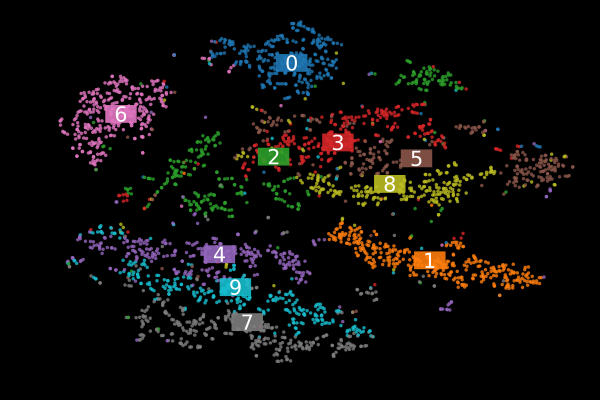

In [107]:
my_tsne_plot(Y1, 5, labels)

### Option 2. ScikitLearn Implementation

In [109]:
@sk_import manifold : TSNE
tfn = TSNE(n_components=2,perplexity=20.0,early_exaggeration=50)

PyObject TSNE(early_exaggeration=50, perplexity=20.0)

In [110]:
Y2 = tfn.fit_transform(data);

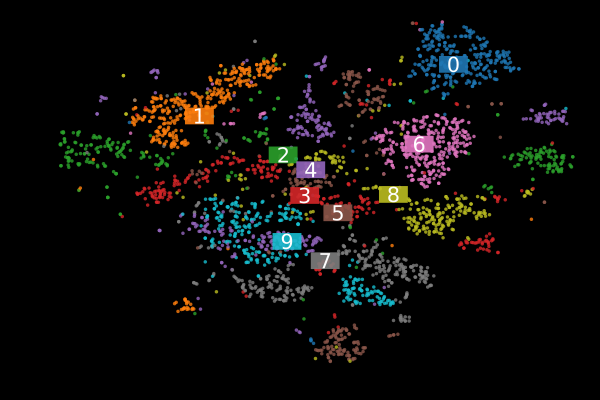

In [111]:
my_tsne_plot(Y2, 4, labels)

### BHTsne 패키지 이용

In [112]:
using BHTsne

LoadError: ArgumentError: Package BHTsne not found in current path:
- Run `import Pkg; Pkg.add("BHTsne")` to install the BHTsne package.


In [116]:
Pkg.clone("https://github.com/zhmz90/BHTsne.jl.git")

LoadError: UndefVarError: clone not defined

In [115]:
using Pkg